In [2]:
import pandas
import numpy as np

#### 1. Read NIRF data as given in Dataset tab on Google Classroom.

In [ ]:
data=pandas.read_csv('./NIRF Dataset.csv')

0                  Indian Institute of Technology Madras
1                   Indian Institute of Technology Delhi
2                  Indian Institute of Technology Bombay
3                  Indian Institute of Technology Kanpur
4               Indian Institute of Technology Kharagpur
                             ...                        
195              Dr. D. Y. Patil Institute of Technology
196              Pimpri Chinchwad College of Engineering
197                  Ramrao Adik Institute of Technology
198                                      BVRIT Hyderabad
199    National Institute of Technology Arunachal Pra...
Name: name, Length: 200, dtype: object


#### 2. Group the data statewise and Count the number of colleges in each state.

In [55]:
data_grouped_by_state=data.groupby(by='state').size()
# for state, entry in data_grouped_by_state:
#     print(state, entry)
display(data_grouped_by_state)

state
Andhra Pradesh       10
Arunachal Pradesh     2
Assam                 3
Bihar                 2
Chandigarh            2
Chhattisgarh          1
Delhi                 7
Goa                   1
Gujarat               7
Haryana               6
Himachal Pradesh      4
Jammu and Kashmir     1
Jharkhand             4
Karnataka            21
Kerala                5
Madhya Pradesh        5
Maharashtra          22
Manipur               1
Meghalaya             1
Odisha                7
Pondicherry           2
Punjab                8
Rajasthan             4
Tamil Nadu           35
Telangana            15
Tripura               1
Uttar Pradesh        11
Uttarakhand           4
West Bengal           8
dtype: int64

#### 3. Sort the records based on rpc attribute (Research Professional practices).

In [66]:
data_sorted_by_rpc=data.sort_values(by='rpc', ascending=False)
# display(data.sort_values(by='rpc', ascending=False)[['rpc', 'name']])
data_sorted_by_rpc['rank']=data_sorted_by_rpc['rpc'].rank(method='min', ascending=False)
display(data_sorted_by_rpc[['rank', 'rpc', 'name']])

,rank,rpc,name
1,1.0,96.15,Indian Institute of Technology Delhi
0,2.0,94.64,Indian Institute of Technology Madras
2,3.0,93.37,Indian Institute of Technology Bombay
4,4.0,87.11,Indian Institute of Technology Kharagpur
3,5.0,82.08,Indian Institute of Technology Kanpur
...,...,...,...
189,196.0,1.15,G.Pulla Reddy Engineering College
185,197.0,1.11,BNM Institute of Technology
186,198.0,0.75,Vasavi College of Engineering
146,199.0,0.71,P E S College of Engineering


#### 4. Find the rank of Panjab University as per rpc attribute.

In [78]:
panjab_university_rank=data_sorted_by_rpc[data_sorted_by_rpc['name']=='Panjab University']['rank'].iloc[0]
print(panjab_university_rank)
display(data_sorted_by_rpc[data_sorted_by_rpc['name']=='Panjab University'][['rank', 'rpc', 'name']])

26.0


,rank,rpc,name
71,26.0,43.55,Panjab University


#### 5. List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [84]:
display(data_sorted_by_rpc[data_sorted_by_rpc['rank']>panjab_university_rank][['name', 'rank', 'rpc']])

,name,rank,rpc
40,S. R. M. Institute of Science and Technology,27.0,41.96
34,Malaviya National Institute of Technology,28.0,41.69
39,National Institute of Technology Kurukshetra,29.0,41.64
25,Indian Institute of Technology Patna,30.0,39.24
18,National Institute of Technology Warangal,31.0,38.12
...,...,...,...
189,G.Pulla Reddy Engineering College,196.0,1.15
185,BNM Institute of Technology,197.0,1.11
186,Vasavi College of Engineering,198.0,0.75
146,P E S College of Engineering,199.0,0.71


#### 6. Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

Text(0.5, 1.0, 'Histogram of Colleges Based on TLR Scores')

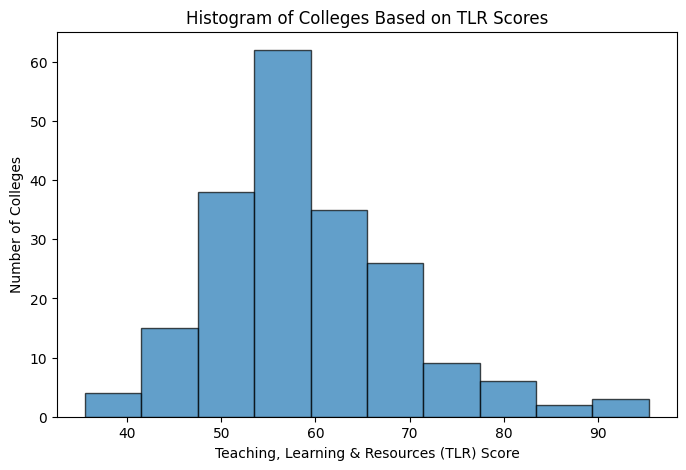

In [86]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.hist(data["tlr"], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Teaching, Learning & Resources (TLR) Score")
plt.ylabel("Number of Colleges")
plt.title("Histogram of Colleges Based on TLR Scores")
